In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Total Population US Census 2017-2060 data
pop_df = pd.read_csv("Resources/Census-Population-By-Age-2016-2060_np2017_d1.csv")

# display data
pop_df.head()

,SEX,ORIGIN,RACE,YEAR,TOTAL_POP,POP_0,POP_1,POP_2,POP_3,POP_4,...,POP_91,POP_92,POP_93,POP_94,POP_95,POP_96,POP_97,POP_98,POP_99,POP_100
0,0,0,0,2016,323127513,3970145,3995008,3992154,3982074,3987656,...,449986,372625,300000,239313,186408,135797,94311,68972,44895,81896
1,0,0,0,2017,325511184,4054035,3982964,4008116,4003478,3992207,...,449945,382669,311525,246219,192531,146801,104540,70840,50486,83574
2,0,0,0,2018,327891911,4075563,4068172,3995888,4019345,4013649,...,462335,382993,320285,256011,198354,151848,113165,78659,51938,86221
3,0,0,0,2019,330268840,4095614,4089881,4082231,4006967,4029427,...,467488,393919,320884,263533,206526,156654,117240,85265,57778,87671
4,0,0,0,2020,332639102,4113164,4110117,4104058,4094281,4016919,...,464985,398712,330389,264318,212880,163348,121128,88491,62724,92064


In [3]:
# filter data to show total pop data for both males and females together. In census total pop dataset:
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females. race == 0 is for all races;
# origin == 0 is for both hispanic and non-hispanic;
# race == 0 is for all races.
pop_df = pop_df.loc[(pop_df['SEX'] == 0) & (pop_df['ORIGIN'] == 0) & (pop_df['RACE'] == 0),:]
pop_df.head()

,SEX,ORIGIN,RACE,YEAR,TOTAL_POP,POP_0,POP_1,POP_2,POP_3,POP_4,...,POP_91,POP_92,POP_93,POP_94,POP_95,POP_96,POP_97,POP_98,POP_99,POP_100
0,0,0,0,2016,323127513,3970145,3995008,3992154,3982074,3987656,...,449986,372625,300000,239313,186408,135797,94311,68972,44895,81896
1,0,0,0,2017,325511184,4054035,3982964,4008116,4003478,3992207,...,449945,382669,311525,246219,192531,146801,104540,70840,50486,83574
2,0,0,0,2018,327891911,4075563,4068172,3995888,4019345,4013649,...,462335,382993,320285,256011,198354,151848,113165,78659,51938,86221
3,0,0,0,2019,330268840,4095614,4089881,4082231,4006967,4029427,...,467488,393919,320884,263533,206526,156654,117240,85265,57778,87671
4,0,0,0,2020,332639102,4113164,4110117,4104058,4094281,4016919,...,464985,398712,330389,264318,212880,163348,121128,88491,62724,92064


Text(0, 0.5, 'Population')

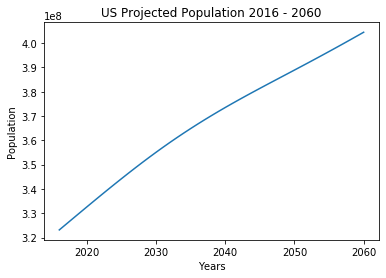

In [4]:
# assign x and y values to prepare to plot graph
year = pop_df['YEAR']
pop = pop_df['TOTAL_POP']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(year, pop)
plt.title('US Projected Population 2016 - 2060')
plt.xlabel('Years')
plt.ylabel('Population')


In [5]:
# calculate growth 
growth_df = pop_df.copy()
growth_df = growth_df.loc[(growth_df['SEX'] == 0) & (pop_df['ORIGIN'] == 0) & (pop_df['RACE'] == 0), :]
growth_df = pop_df.iloc[:, 3:5]

growth_df

,YEAR,TOTAL_POP
0,2016,323127513
1,2017,325511184
2,2018,327891911
3,2019,330268840
4,2020,332639102
5,2021,334998398
6,2022,337341954
7,2023,339665118
8,2024,341963408
9,2025,344234377


In [6]:
total_pop = growth_df['TOTAL_POP'].tolist()
growth_initial = total_pop[1] - total_pop[0]

growth_rate = []
avg_growth_rate = 0

for x in range(0,len(total_pop)):
    if x == 0:
        growth_rate.append(growth_initial)
    else:
        growth_rate.append(total_pop[x] - total_pop[x-1])
    avg_growth_rate = int((growth_rate[x] + growth_rate[x-1])/2)


growth_rate_change = []
avg_growth_rate_change = 0
growth_rate_change_initial = growth_rate[0] - growth_rate[1]
for x in range(0,len(growth_rate)):
    if x == 0:
        growth_rate_change.append(growth_rate_change_initial)
    else:
        growth_rate_change.append(growth_rate[x-1] - growth_rate[x])
    avg_growth_rate_change = int((growth_rate_change[x-1] + growth_rate_change[x])/2)

#print(avg_growth_rate)
#print(avg_growth_rate_change) 

In [30]:
proj_pop = total_pop.copy()
proj_year = growth_df['YEAR'].tolist()

new_growth_rate = avg_growth_rate
while new_growth_rate > 0:
    proj_year.append(proj_year[-1] + 1)
    proj_pop.append(proj_pop[-1] + new_growth_rate)
    new_growth_rate += avg_growth_rate_change   
    #print(new_growth_rate)

#print(proj_pop)
#print(proj_year)

In [31]:
# Extend the data another 50 years
for x in range(50):
    proj_year.append(proj_year[-1] + 1)
    proj_pop.append(proj_pop[-1] + new_growth_rate)
    new_growth_rate += avg_growth_rate_change 
#print(proj_pop)
#print(proj_year)

In [32]:
# Now reduce the population rates from 2019 on by the NIM change from 2018
nim_decrease = 1001528 - 595348
nim_total_pop = total_pop.copy()
nim_total_pop = [x - nim_decrease for x in nim_total_pop]
#print(nim_total_pop)

In [33]:
nim_growth_initial = nim_total_pop[1] - nim_total_pop[0]
nim_growth_rate = []
nim_avg_growth_rate = 0

for x in range(0,len(nim_total_pop)):
    if x == 0:
        nim_growth_rate.append(nim_growth_initial)
    else:
        nim_growth_rate.append(nim_total_pop[x] - nim_total_pop[x-1])
    nim_avg_growth_rate = int((nim_growth_rate[x] + nim_growth_rate[x-1])/2)

nim_growth_rate_change = []
nim_avg_growth_rate_change = 0
nim_growth_rate_change_initial = nim_growth_rate[0] - nim_growth_rate[1]

for x in range(0,len(nim_growth_rate)):
    if x == 0:
        nim_growth_rate_change.append(nim_growth_rate_change_initial)
    else:
        nim_growth_rate_change.append(nim_growth_rate[x-1] - nim_growth_rate[x])
    nim_avg_growth_rate_change = int((nim_growth_rate_change[x-1] + nim_growth_rate_change[x])/2)

#print(nim_avg_growth_rate)
#print(nim_avg_growth_rate_change) 

In [34]:
nim_proj_pop = nim_total_pop.copy()
nim_proj_year = growth_df['YEAR'].tolist()

nim_new_growth_rate = nim_avg_growth_rate
while nim_new_growth_rate > 0:
    nim_proj_year.append(nim_proj_year[-1] + 1)
    nim_proj_pop.append(nim_proj_pop[-1] + nim_new_growth_rate)
    nim_new_growth_rate += nim_avg_growth_rate_change    
    print(nim_new_growth_rate)

#print(nim_new_growth_rate)
#print(nim_avg_growth_rate)
#print(nim_proj_pop)
#print(nim_proj_year)

1591687
1580142
1568597
1557052
1545507
1533962
1522417
1510872
1499327
1487782
1476237
1464692
1453147
1441602
1430057
1418512
1406967
1395422
1383877
1372332
1360787
1349242
1337697
1326152
1314607
1303062
1291517
1279972
1268427
1256882
1245337
1233792
1222247
1210702
1199157
1187612
1176067
1164522
1152977
1141432
1129887
1118342
1106797
1095252
1083707
1072162
1060617
1049072
1037527
1025982
1014437
1002892
991347
979802
968257
956712
945167
933622
922077
910532
898987
887442
875897
864352
852807
841262
829717
818172
806627
795082
783537
771992
760447
748902
737357
725812
714267
702722
691177
679632
668087
656542
644997
633452
621907
610362
598817
587272
575727
564182
552637
541092
529547
518002
506457
494912
483367
471822
460277
448732
437187
425642
414097
402552
391007
379462
367917
356372
344827
333282
321737
310192
298647
287102
275557
264012
252467
240922
229377
217832
206287
194742
183197
171652
160107
148562
137017
125472
113927
102382
90837
79292
67747
56202
44657
33112
21

In [35]:
# Extend the data another 50 years
for x in range(50):
    nim_proj_year.append(nim_proj_year[-1] + 1)
    nim_proj_pop.append(nim_proj_pop[-1] + nim_new_growth_rate)
    nim_new_growth_rate += nim_avg_growth_rate_change 
#print(nim_proj_pop)
#print(nim_proj_year)

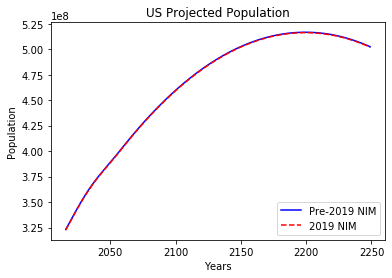

In [37]:
# plot data using line graph
ax, fig = plt.subplots()
#plt.plot(proj_year, proj_pop)
plt.title('US Projected Population')
plt.xlabel('Years')
plt.ylabel('Population')
current_nim = fig.plot(proj_year, proj_pop, color = "blue", label = "Pre-2019 NIM")
low_nim = fig.plot(nim_proj_year, nim_proj_pop, color = "red", linestyle='dashed', label = "2019 NIM")
plt.legend(loc="lower right")